In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.impute import KNNImputer
import requests
import os
import datetime

In [21]:
# Load the dataset
df = pd.read_csv('synop_data/synop.csv')
df

,numer_sta,date,ff,t,td,u,nbas,hbas,pres,tminsol,rr12,nnuage1,hnuage1
0,7027,2024-06-01 09:00:00,5.0,285.95,281.25,73.0,8.0,800.0,101620.0,287.25,-0.1,8.0,600.0
1,7110,2024-06-01 09:00:00,7.7,288.65,281.15,61.0,0.0,0.0,101390.0,280.85,0.0,0.0,0.0
2,7130,2024-06-01 09:00:00,4.0,286.85,282.85,77.0,8.0,800.0,101970.0,286.95,0.0,7.0,600.0
3,7222,2024-06-01 09:00:00,4.4,288.25,282.85,70.0,8.0,800.0,102010.0,287.95,0.0,8.0,900.0
4,7027,2024-06-01 12:00:00,5.2,285.85,282.65,81.0,8.0,450.0,101710.0,287.25,-0.1,8.0,510.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30573,7222,2024-08-31 12:00:00,1.7,297.65,292.25,72.0,2.0,800.0,101310.0,289.95,-0.1,2.0,870.0
30574,7027,2024-08-31 15:00:00,3.1,295.25,289.75,71.0,7.0,800.0,100990.0,290.65,0.0,7.0,600.0
30575,7110,2024-08-31 15:00:00,4.3,296.05,290.75,72.0,1.0,800.0,100450.0,288.95,6.1,1.0,750.0
30576,7130,2024-08-31 15:00:00,1.9,297.45,290.95,67.0,6.0,1750.0,101170.0,288.55,0.0,6.0,1560.0


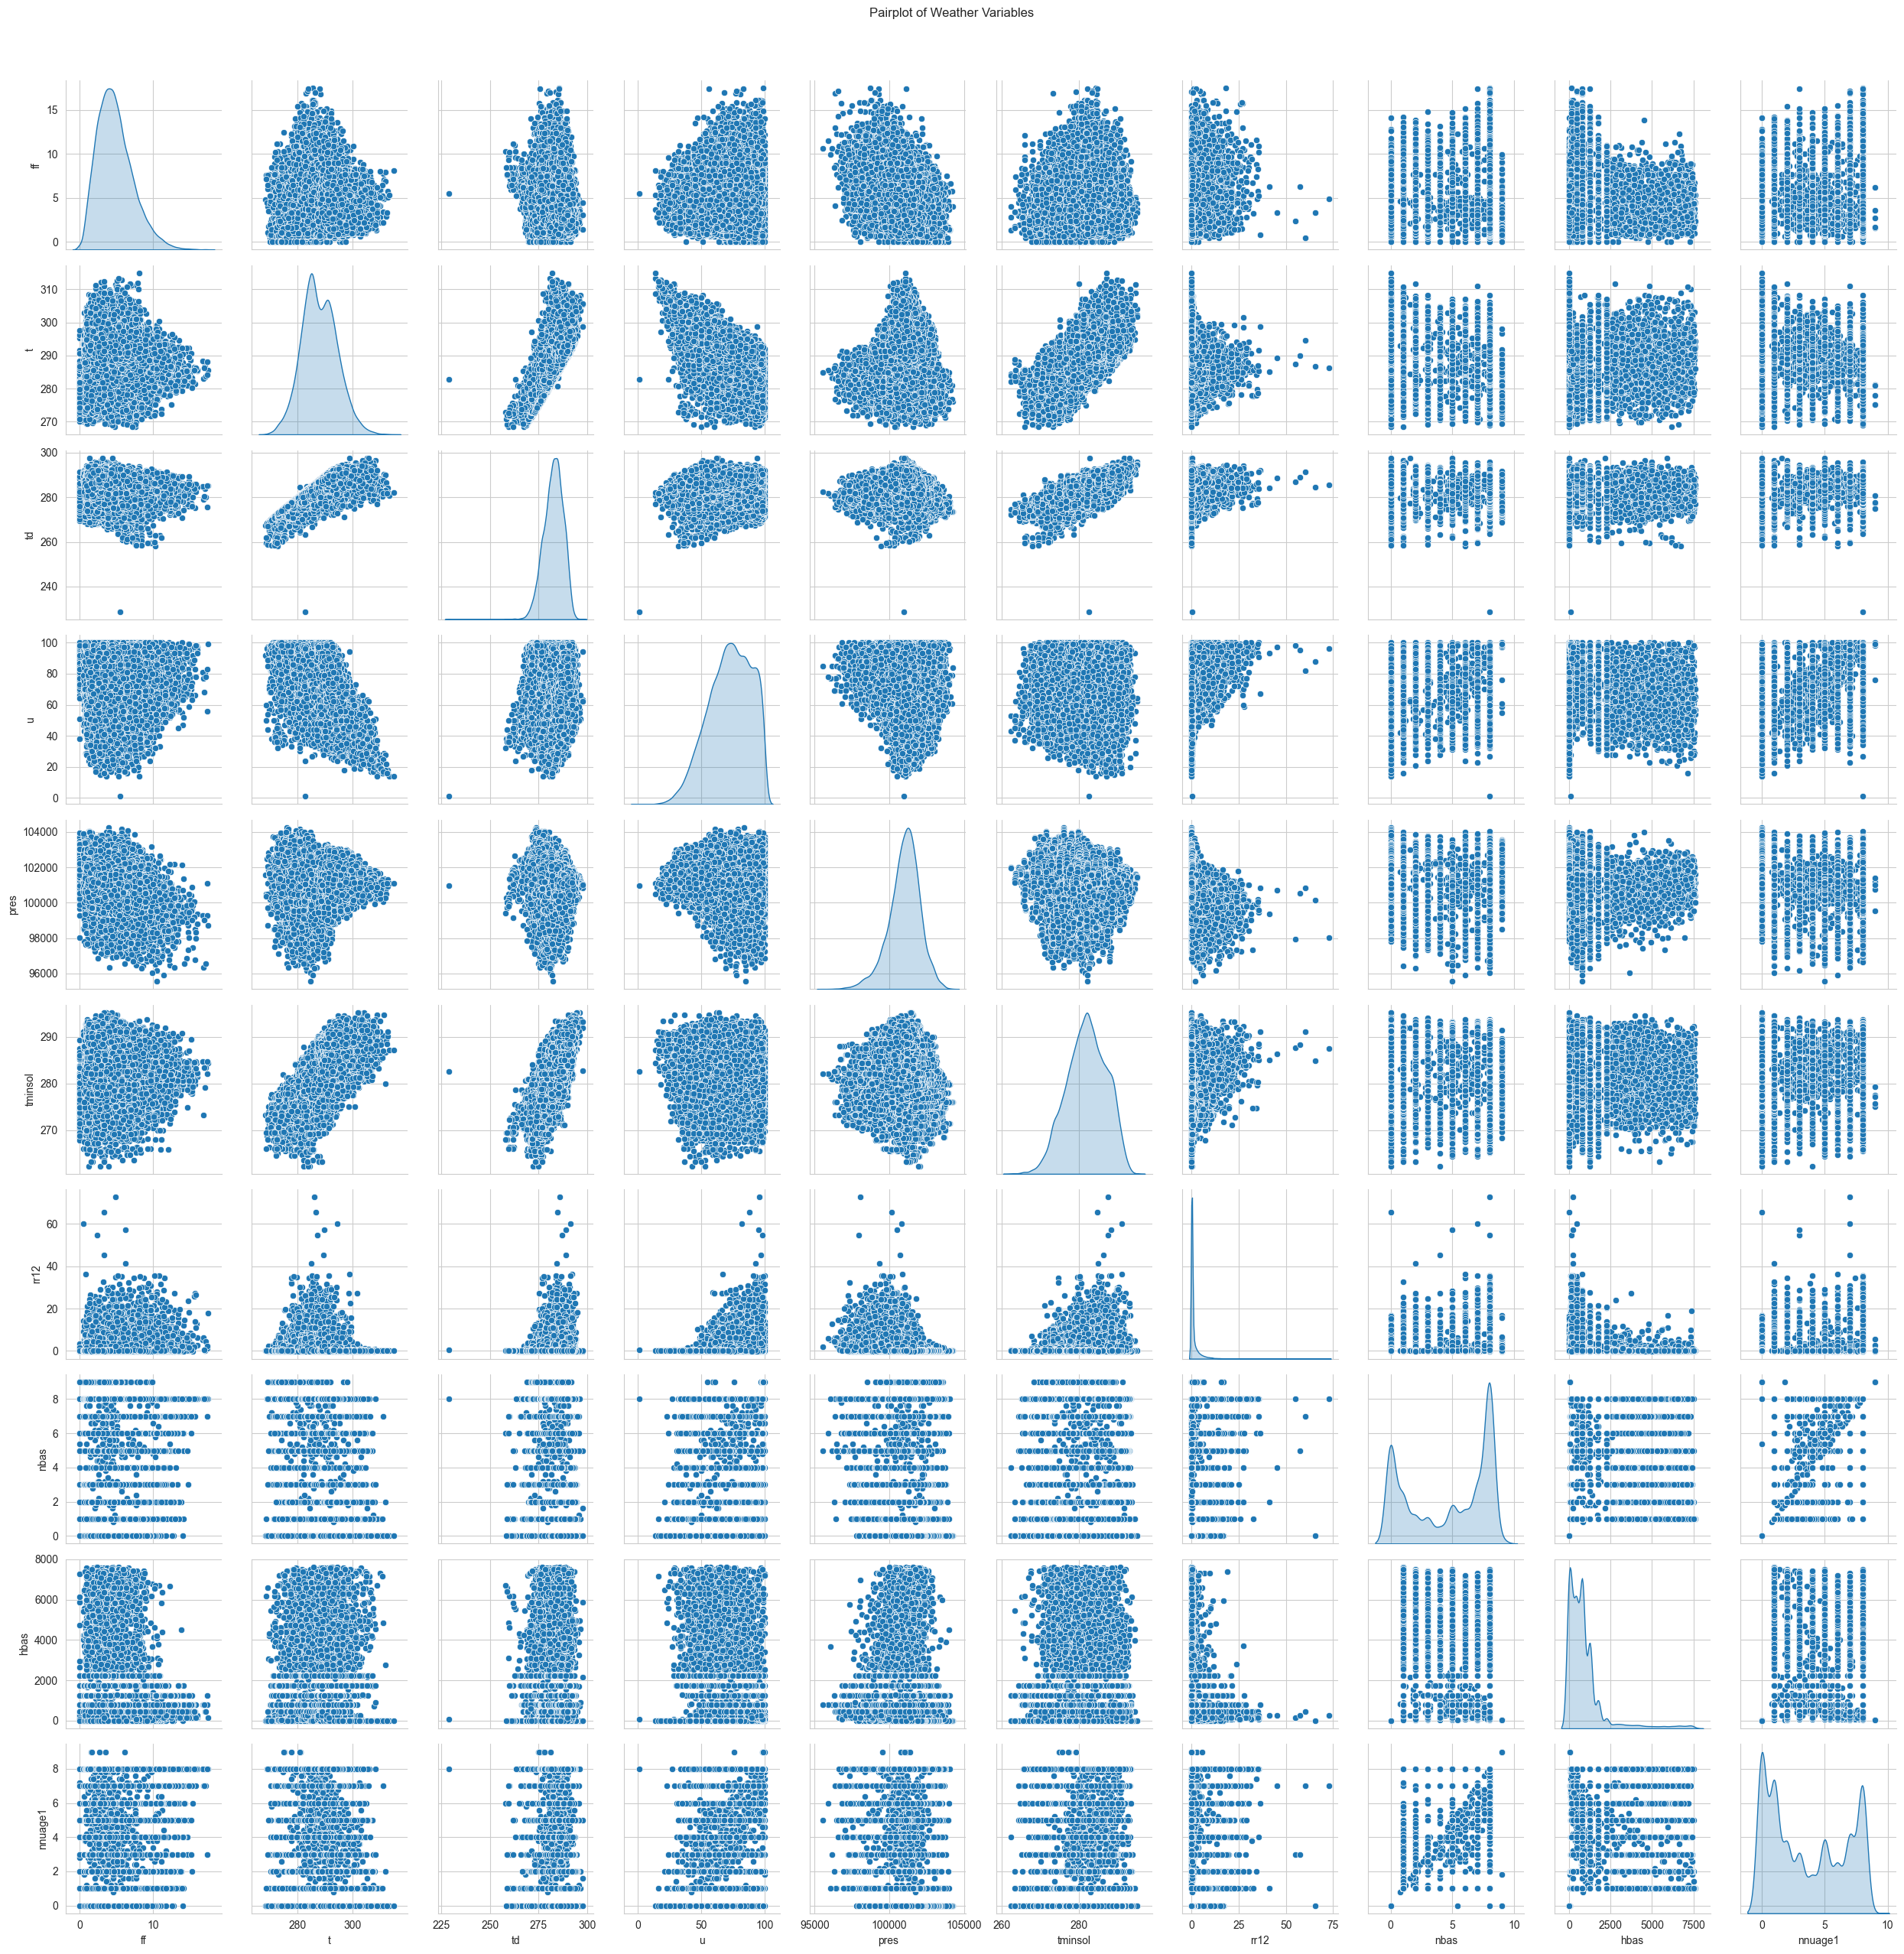

In [22]:
# Convert numeric columns that are stored as objects to float
numeric_cols = ['ff', 't', 'td', 'u', 'pres', 'tminsol', 'rr12', 'nbas', 'hbas', 'nnuage1']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Select a subset of numeric columns for the pairplot to avoid too many plots
plot_cols = ['ff', 't', 'td', 'u', 'pres', 'tminsol', 'rr12', 'nbas', 'hbas', 'nnuage1']
    
# Create the pairplot
sns.pairplot(df[plot_cols].dropna(), diag_kind='kde')
plt.suptitle('Pairplot of Weather Variables', y=1.02)
plt.tight_layout()
plt.show()

<Figure size 1200x1000 with 0 Axes>

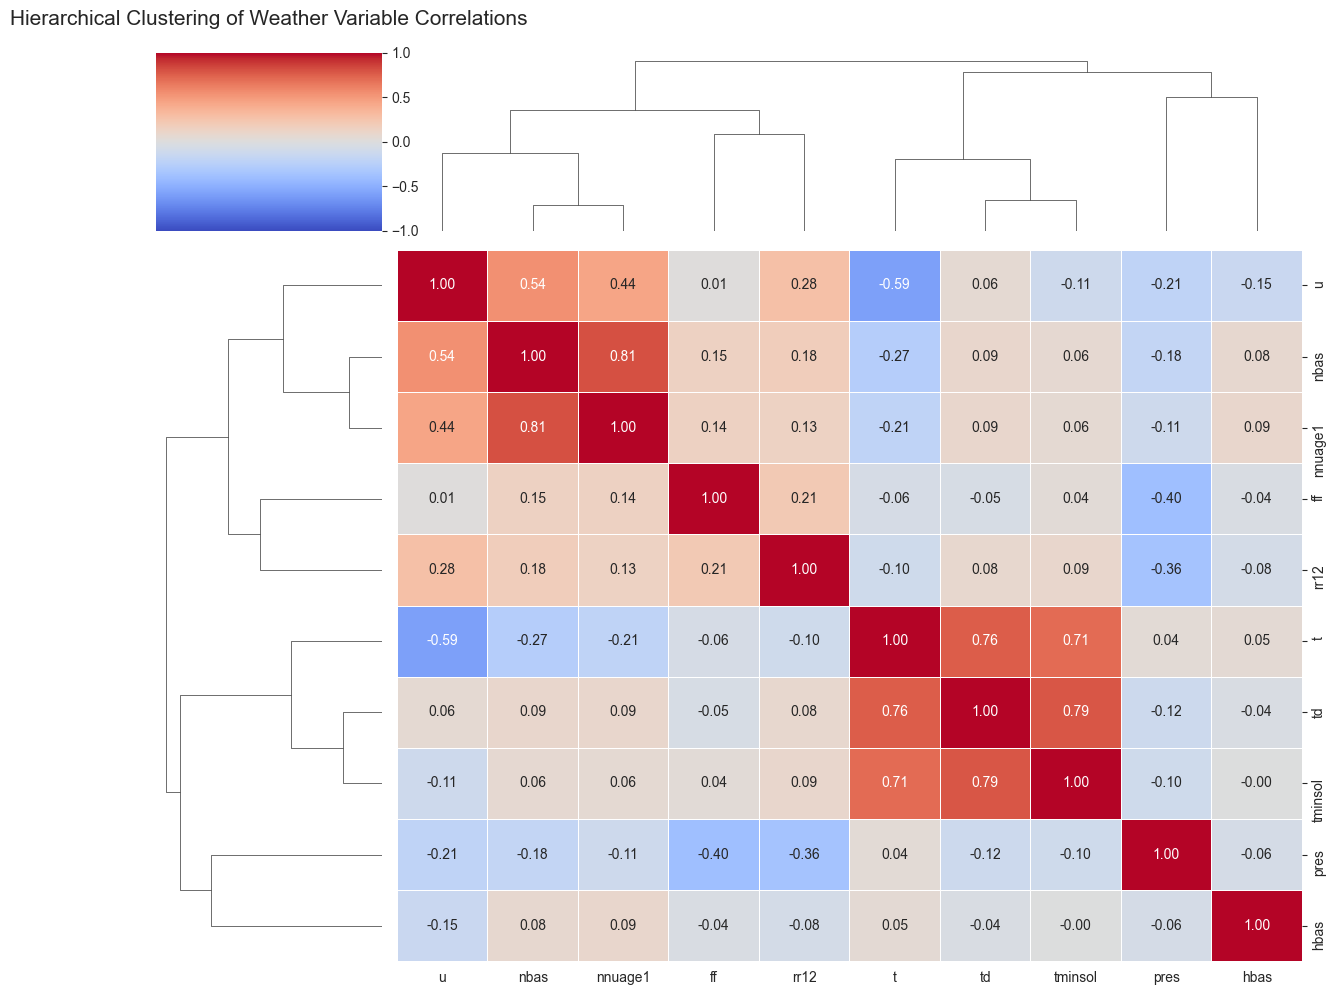

In [23]:
# Select only numeric columns for the clustermap
numeric_df = df[numeric_cols].dropna()

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Create a clustermap
plt.figure(figsize=(12, 10))
cluster = sns.clustermap(
    corr_matrix, 
    annot=True,
    cmap="coolwarm",
    vmin=-1, vmax=1,
    linewidths=0.5,
    fmt=".2f",
    figsize=(12, 10),
    dendrogram_ratio=0.2,
    cbar_pos=(0.02, 0.8, 0.05, 0.18)
)

plt.title("Hierarchical Clustering of Weather Variable Correlations", fontsize=15, pad=20)
plt.tight_layout()
plt.show()

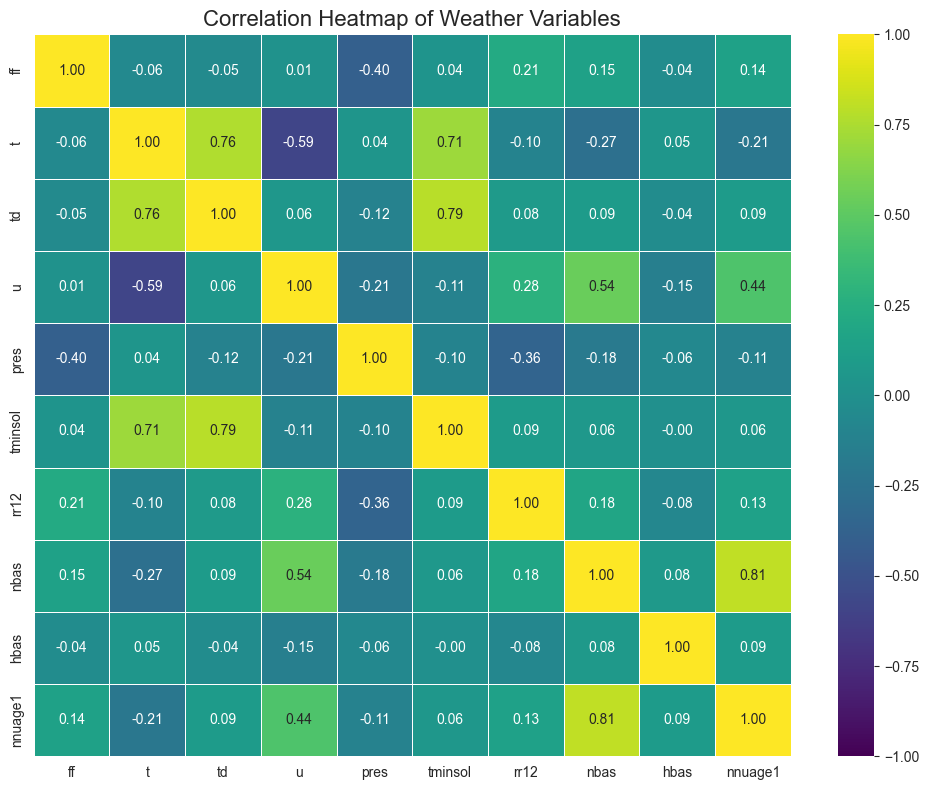

In [24]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(
    corr_matrix, 
    annot=True,
    cmap="viridis",
    vmin=-1, vmax=1,
    linewidths=0.5,
    fmt=".2f"
)

plt.title("Correlation Heatmap of Weather Variables", fontsize=16)
plt.tight_layout()
plt.show()